In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

In [2]:
org_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")
sample = pd.read_csv("data/sample_submission.csv")
features_df = pd.read_csv("features_df.csv")

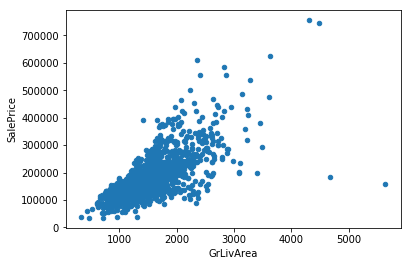

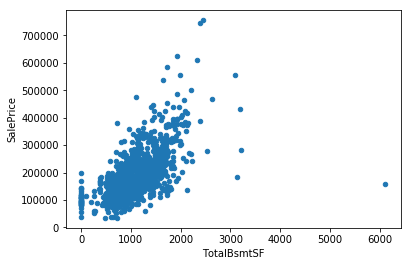

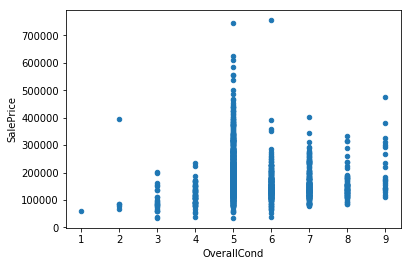

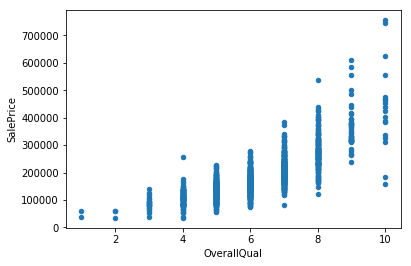

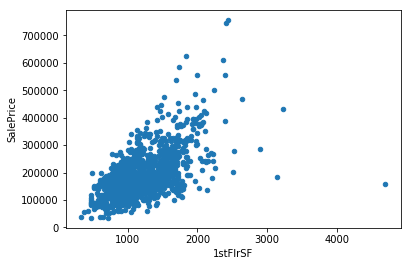

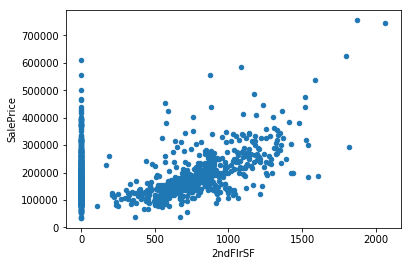

In [39]:
for col in ["GrLivArea", "TotalBsmtSF", "OverallCond", "OverallQual", "1stFlrSF", "2ndFlrSF"]:
    org_df.plot.scatter(x = col, y = "SalePrice")

In [3]:
org_df = org_df.loc[org_df["GrLivArea"] < 4500]
org_df = org_df.loc[org_df["TotalBsmtSF"] < 6000]
org_df = org_df.loc[org_df["1stFlrSF"] < 4000]

In [13]:
org_df.shape

(1458, 81)

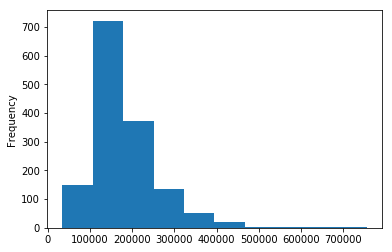

In [565]:
target.plot.hist()

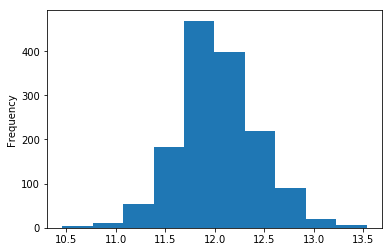

In [523]:
log_target.plot.hist()

TypeError: Empty 'DataFrame': no numeric data to plot

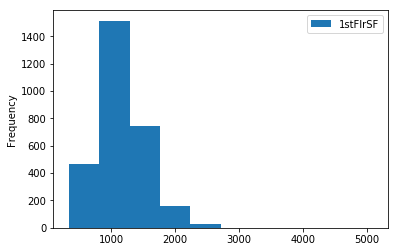

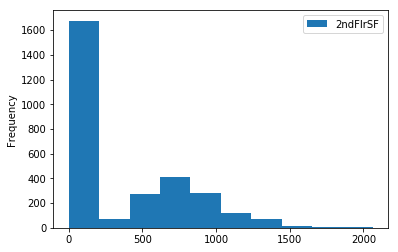

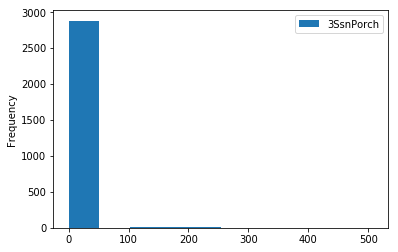

In [42]:
for i in range(0,len(features_df.columns)):
    features_df[[features_df.columns[i]]].plot.hist()

In [4]:
target = org_df["SalePrice"]
log_target = np.log(target)

In [53]:
print(org_df.shape)
print(test_df.shape)

(1458, 81)
(1459, 80)


In [591]:
features_df = pd.concat([org_df, test_df], axis = 0).drop(["Id","SalePrice", "Utilities"], axis = 1)

In [575]:
features_df.shape

(2915, 78)

In [576]:
features_df["SaleType"].value_counts()

WD       2523
New       237
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [48]:
features_df.isna().sum()[features_df.isna().sum()!=0]

Series([], dtype: int64)

In [127]:
features_df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,TotalSF,YrBtwRemod
0,856,854,0,None,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,None,None,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,None,0,2,CollgCr,61,5,7,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,8,856.0,0,2003,2003,2008,2566.0,5
1,1262,0,0,None,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,None,TA,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,None,0,5,Veenker,0,8,6,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,6,1262.0,298,1976,1976,2007,2524.0,31
2,920,866,0,None,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,None,TA,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,None,0,9,CollgCr,42,5,7,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,6,920.0,0,2001,2002,2008,2706.0,6
3,961,756,0,None,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,None,Gd,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,None,0,2,Crawfor,35,5,7,Y,0,None,CompShg,Gable,Abnorml,WD,0,Pave,7,756.0,0,1915,1970,2006,2473.0,36
4,1145,1053,0,None,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,None,TA,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,None,0,12,NoRidge,84,5,8,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,9,1145.0,192,2000,2000,2008,3343.0,8


In [592]:
for col in ["BsmtCond", "BsmtQual", "BsmtFinType1", "BsmtExposure", "BsmtFinType2", "GarageType", "GarageFinish",
           "GarageQual", "GarageCond", "Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature", "MasVnrType",
           "KitchenQual", "Exterior1st", "Exterior2nd"]:
    features_df[col] = features_df[col].fillna("None")
    
for col in ["MasVnrArea", "GarageYrBlt", "TotalBsmtSF", "BsmtFinSF1", "BsmtFinSF2", "BsmtFullBath", "BsmtHalfBath",
           "BsmtUnfSF", "GarageArea", "GarageCars"]:
    features_df[col] = features_df[col].fillna(0)

In [593]:
features_df["LotFrontage"] = features_df["LotFrontage"].fillna(np.median(features_df.loc[features_df["LotFrontage"].notnull(), "LotFrontage"]))

In [594]:
features_df["Electrical"] = features_df["Electrical"].fillna("SBrkr")
features_df["MSZoning"] = features_df["MSZoning"].fillna("RL")
features_df["Functional"] = features_df["Functional"].fillna("Typ")
features_df["SaleType"] = features_df["SaleType"].fillna("WD")

In [5]:
features_df[["MSSubClass", "OverallQual", "OverallCond"]] = features_df[["MSSubClass", "OverallQual", "OverallCond"]].astype("str")

In [6]:
features_df["TotalSF"] = features_df["GrLivArea"] + features_df["TotalBsmtSF"]

In [7]:
features_df["YrBtwRemod"] = features_df["YrSold"] - features_df["YearRemodAdd"]

In [8]:
dummied_features = pd.get_dummies(features_df, drop_first = True)
dummied_features.shape

(2917, 291)

In [9]:
train = dummied_features[:1458]
test = dummied_features[1458:]

In [130]:
lasso = Lasso()
alphas = np.linspace(0, 0.001, 20)
grid_param = [{"alpha": alphas}]
lasso.set_params(normalize = True)
n_folds = 10

clf = GridSearchCV(lasso, grid_param, cv = n_folds, refit = False)
clf.fit(train, log_target)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

In [131]:
print(clf.best_params_)
print(clf.best_score_)

{'alpha': 0.00010526315789473685}
0.9143162922724101


In [67]:
scores

array([0.90140656, 0.91400771, 0.91431629, 0.91195821, 0.90733523,
       0.90199673, 0.89581976, 0.88986698, 0.88469935, 0.87973659,
       0.87472074, 0.86968392, 0.86450436, 0.85934395, 0.85414172,
       0.84893362, 0.84413867, 0.8395459 , 0.83507639, 0.83072004])

In [58]:
clf.best_params_

{'alpha': 0.00010526315789473685}

In [65]:
lasso = Lasso()
lasso.set_params(alpha = 0.000105, normalize = True)
lasso.fit(train, log_target)
coefs_df = pd.concat([pd.DataFrame(train.columns), pd.DataFrame(lasso.coef_)], axis = 1)
coefs_df.columns = ["Col", "Coef"]
coefs_df.sort_values(by="Coef", ascending = False)
coefs_df.loc[coefs_df["Col"] == "TotalSF"]

,Col,Coef
33,TotalSF,0.000117


In [132]:
lasso = Lasso(alpha = 0.000105, normalize = False)
lasso.fit(train, log_target)
lasso_pre = np.exp(lasso.predict(test))

In [133]:
lasso_pre

array([119556.11742131, 153853.8629595 , 186569.77388224, ...,
       174493.2666744 , 113934.17995739, 214012.41558615])

In [19]:
pre_log_y = lasso.predict(train)

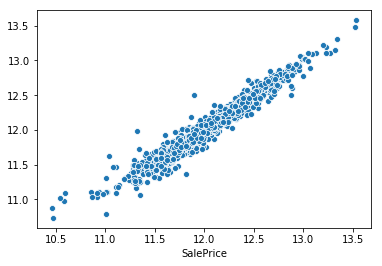

In [20]:
sns.scatterplot(x = log_target, y = pre_log_y)

In [21]:
log_target.shape

(1458,)

In [22]:
(np.mean((pre_log_y - log_target)**2))**.5

0.09244662841917678

In [78]:
log_residuals = pre_log_y - log_target

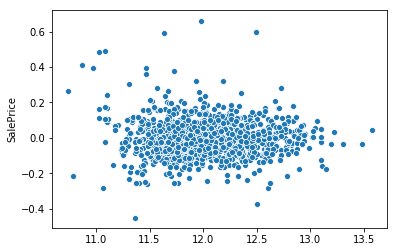

In [79]:
sns.scatterplot(x = pre_log_y, y = log_residuals)

In [13]:
sample["SalePrice"] = lasso_pre

In [14]:
sample.to_csv("lasso3.csv", index = False)

In [17]:
ridge = Ridge()
alphas = np.linspace(0.2, 0.3, 20)
grid_param = [{"alpha": alphas}]
ridge.set_params(normalize = True)
n_folds = 10

clf = GridSearchCV(ridge, grid_param, cv = n_folds, refit = False)
clf.fit(train, log_target)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

In [18]:
scores

array([0.9106905 , 0.91071265, 0.91073169, 0.91074773, 0.91076089,
       0.91077128, 0.910779  , 0.91078414, 0.91078679, 0.91078704,
       0.91078497, 0.91078067, 0.9107742 , 0.91076564, 0.91075505,
       0.91074251, 0.91072807, 0.91071179, 0.91069372, 0.91067393])

In [19]:
print(clf.best_params_)
print(clf.best_score_)

{'alpha': 0.24736842105263157}
0.9107870385742644


In [23]:
ela = ElasticNet(normalize = True)
alphas = np.linspace(0, 0.001, 20)
l1r = np.linspace(0,1,10)
grid_param = [{"alpha": alphas, "l1_ratio": l1r}]
n_folds = 10
clf = GridSearchCV(ela, grid_param, cv = n_folds, refit = False)
clf.fit(train, log_target)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

In [25]:
print(clf.best_params_)
print(clf.best_score_)

{'alpha': 0.00010526315789473685, 'l1_ratio': 0.5555555555555556}
0.9144980728502518


In [7]:
le = preprocessing.LabelEncoder()
cat_cols = features_df.dtypes[(features_df.dtypes != "int64") & (features_df.dtypes != "float64")].index
tr_features = features_df.copy()

In [8]:
for col in cat_cols:
    le.fit(tr_features[col])
    tr_features[col] = le.transform(tr_features[col])

In [9]:
tr_train = tr_features[:1458]
tr_test = tr_features[1458:]

In [137]:
tr_train.shape

(1458, 80)

In [75]:
rf = RandomForestRegressor(max_features = 9)
depth = [10,20]
n_est = [500,1000]
grid_param = [{"max_depth": depth, "n_estimators": n_est}]
n_folds = 5

clf = GridSearchCV(rf, grid_param, cv = n_folds, refit = False)
clf.fit(tr_train, log_target)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

TypeError: __init__() got an unexpected keyword argument 'learning_rate'

In [74]:
print(clf.best_params_)
print(clf.best_score_)

{'max_depth': 20, 'n_estimators': 300}
0.8829864064758158


In [48]:
scores

array([0.88319027, 0.883122  , 0.88364303, 0.88357651])

In [46]:
print(clf.best_params_)

{'max_depth': 150, 'n_estimators': 1000}


In [115]:
gbm = GradientBoostingRegressor(max_features = "sqrt", learning_rate = 0.03)
depth = [2,3,5]
n_est = [1000,2000,3000]
grid_param = [{"max_depth": depth, "n_estimators": n_est}]
n_folds = 5

clf = GridSearchCV(gbm, grid_param, cv = n_folds, refit = False)
clf.fit(tr_train, log_target)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

In [116]:
scores

array([0.91386158, 0.91673188, 0.91608121, 0.91370515, 0.91692441,
       0.9167801 , 0.91549764, 0.91665743, 0.91795728, 0.91507623,
       0.9170741 , 0.91621301, 0.91777356, 0.91503614, 0.91685961,
       0.91432689, 0.91725125, 0.91701051, 0.91358995, 0.91213102,
       0.9128843 , 0.9126001 , 0.91309631, 0.91134861, 0.91186336,
       0.91173914, 0.91159788])

In [114]:
print(clf.best_params_)
print(clf.best_score_)

{'max_depth': 3, 'max_features': 10, 'n_estimators': 2000}
0.9183698604708133


In [138]:
gbm.set_params(max_features = "sqrt", learning_rate = 0.03, max_depth = 3, n_estimators = 2000)
gbm.fit(tr_train, log_target)
gbm_pre = gbm.predict(tr_test)

In [139]:
np.exp(gbm_pre)

array([124017.54917834, 166589.72637211, 189027.75884822, ...,
       162922.26659801, 121612.80043739, 218967.65177805])

In [118]:
xgbla = pd.read_csv("xgblasso.csv")

In [119]:
sample["SalePrice"] = (np.exp(gbm_pre)+xgbla["SalePrice"])/2

In [120]:
sample.to_csv("gbmxgbla.csv", index = False)

In [29]:
egb = xgb.XGBRegressor(silent = 1, eta = 0.01)
depth = [2,3,6]
n_est = [300,600,900]
csby = [0.4, 0.5, 0.6]
grid_param = [{"max_depth": depth, "n_estimators": n_est, "colsample_bytree": csby}]
n_folds = 5

clf = GridSearchCV(egb, grid_param, cv = n_folds, refit = False)
clf.fit(tr_train, log_target)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

In [27]:
print(clf.best_params_)
print(clf.best_score_)

{'colsample_bytree': 0.5, 'gamma': 0, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 600}
0.914444428999778


In [30]:
print(clf.best_params_)
print(clf.best_score_)

{'colsample_bytree': 0.5, 'max_depth': 3, 'n_estimators': 600}
0.914444428999778


In [31]:
scores

array([0.90703305, 0.90909387, 0.90925952, 0.91147069, 0.91155549,
       0.91161972, 0.90267698, 0.90264079, 0.90263668, 0.90964748,
       0.91059454, 0.91160941, 0.91377203, 0.91444443, 0.91410807,
       0.909143  , 0.9090804 , 0.90908039, 0.91017424, 0.9115182 ,
       0.91170511, 0.91208862, 0.91290445, 0.91293669, 0.90757053,
       0.90753022, 0.90752985])

In [18]:
egb = xgb.XGBRegressor(eta = 0.01, max_depth = 3, n_estimators = 600, colsample_bytree = 0.5)
egb.fit(tr_train, log_target)
egb_pre = egb.predict(tr_test)

In [19]:
np.exp(egb_pre)

array([132458.34, 161891.61, 204474.6 , ..., 164805.42, 118692.89,
       219549.83], dtype=float32)

In [13]:
lasso3 = pd.read_csv("lasso3.csv")

In [20]:
sample["SalePrice"] = np.exp(egb_pre)

In [21]:
sample.to_csv("xgbfinal.csv", index = False)

In [22]:
sample

,Id,SalePrice
0,1461,132458.343750
1,1462,161891.609375
2,1463,204474.593750
3,1464,195217.859375
4,1465,188491.578125
5,1466,170095.125000
6,1467,180451.984375
7,1468,165478.703125
8,1469,178619.953125
9,1470,128064.726562
